# Nelinearna optimizacija

Metoda linearnega programiranja ni primerna za reševanje optimizacijskih problemov, kadar kriterijska funkcija ni linearna, npr. če vsebuje logaritemsko funkcijo neke spremenljivke. V tem primeru uporabimo metode nelinearne optimizacije. 

## Knjižnice
Uporabili bomo knjižnico `optimize` , del `scipy` paketa.

https://docs.scipy.org/doc/scipy/reference/optimize.html

In [1]:
%matplotlib inline
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

## Eno-dimenzijski problem (ena spremenljivka)

### Primeri funkcij
$y = x^4$   
$y = x^3$  
$y = (x+3)(x-1)^2$

Definirati moramo funkcijo in njen prvi odvod, ki ga potrebuje Newtonova metoda. Narišemo graf funkcije, da vidimo njen potek. 

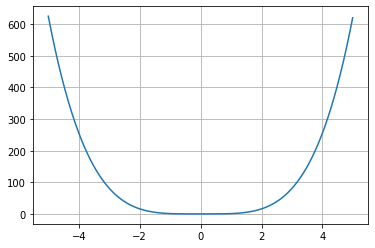

In [2]:
def f(x):
    return x**4

def f_p(x):
    return (4*(x**3))

"""
Draw the function
"""
num_points = 1000 #how many points
start = -5 #starting point
end =  -start #end point
step = 2*abs(start)/num_points
point = []
data = []

for i in range(0,num_points):
    point.append(start+i*step);
    data.append(f(start+i*step));
plt.plot(point,data);
plt.grid()
plt.show()

### Newtonova metoda

Ena osnovnih iterativnih gradientnih metod deluje tako, da izračuna smer gradienta in v tej smeri poišče naslednjo točko z manjšo vrednostjo kriterijske funkcije.

$x_{k+1} = x_{k} - \frac{f'(x_k)}{f''(x_k)}$. 

Metoda potrebuje začetno točko (približek) in opcijsko podano gradientno funkcijo, če ta ni podana bo uporabila numerično izračunano oceno. 

#### Uporaba: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_ncg.html#scipy.optimize.fmin_ncg

scipy.optimize.fmin_ncg (f, x0, fprime, fhess_p=None, fhess=None, args=(), avextol=1e-05, epsilon=1.4901161193847656e-08, maxiter=None, full_output=0, disp=1, retall=0, callback=None)

    Unconstrained minimization of a function using the Newton-CG method.

    Parameters

        f:  callable f(x, *args)
            Objective function to be minimized.

        x0:  ndarray
            Initial guess.

        fprime:  callable f'(x, *args)
            Gradient of f.

        fhess_p:  callable fhess_p(x, p, *args), optional

            Function which computes the Hessian of f times an arbitrary vector, p.
        
        fhess:  callable fhess(x, *args), optional

            Function to compute the Hessian matrix of f.
        
        args:  tuple, optional

            Extra arguments passed to f, fprime, fhess_p, and fhess (the same set of extra arguments is supplied to all of these functions).
            
        epsilon:  float or ndarray, optional

            If fhess is approximated, use this value for the step size.
        
        callback:  callable, optional

            An optional user-supplied function which is called after each iteration. Called as callback(xk), where xk is the current parameter vector.
        
        avextol:  float, optional

            Convergence is assumed when the average relative error in the minimizer falls below this amount.
        
        maxiter:  int, optional

            Maximum number of iterations to perform.
        
        full_output:  bool, optional

            If True, return the optional outputs.
        
        disp:  bool, optional

            If True, print convergence message.
        
        retall: bool, optional

            If True, return a list of results at each iteration.



In [23]:
# Starting estimate of x 
start = 5 

# Newton method
print (optimize.fmin_ncg(f,start,f_p ) ) 

# Newton method: limit number of iterations
#print (optimize.fmin_ncg(f,start,f_p, maxiter = 5)  )  

# Newton, tolerance (error) is larger ( avextol : maximum average relative error )
#print (optimize.fmin_ncg(f,start,f_p, avextol=1e-2)) 


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 72
         Hessian evaluations: 0
[0.00507484]


### Vprašanje 1:
Kaj zahteva funkcija kot parametre, kaj izpiše in kaj vrne metoda? Kateri primer oziroma parametri so dali najboljši približek pravilne rešitve? 

### Metoda konjugiranega gradienta / Conjugate gradient descent
Metoda je gradientna metoda podobno kot Newtonova, vendar bolj natančno izračuna smer z ortogonalizacijo gradientnega vektorja, kar pomeni hitrejši spust in manj iteracij (hitrejšo konvergenco) za doseganje minimuma. 

> Conjugate gradient descent (CG) works in a similar fashion as Netwton's method, but tries to accelerate the convergence speed(i.e. how fast we find the solution). It achieves this by orthogonalizing the gradient vector - making it's descend steeper and thus faster. The orthogonalizing is based on the Grahm-Schmidt procedure. The function can work without the gradient (f_p) but will resort to a numerical estimate in such a case.

In [26]:
start = -3 #starting estimate

print (optimize.fmin_cg(f,start,f_p, disp=True)) 

#print( optimize.fmin_cg(f,start,f_p, gtol=1e-10)) #increased accuracy, tolerance is less

# Here, we did not provide derivative method. 
# print( optimize.fmin_cg(f, start, gtol=1e-4, epsilon=1e-1)) #changed step size

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 5
[-0.01056919]


### Simpleksna metoda / Downhill simplex method

Metoda direktnega iskanja, ki ne potrebuje odvoda, saj primerja funkcijske vrednosti na robovih simpleksa in napreduje v smeri manjših vrednosti.  

> In the most simplified version - simplex algorithm works by trailing along the edges of feasible space (defined as a polytope) in the assumption that one of the vertices contains the desired extreme point (= lowest value). In a way it is similar to the graphical solution of the LP problem except that it works in a much more complex space. Another advantage is that it does not require the gradient function.

https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method

In [27]:
start = 5;
print (optimize.fmin(f, start)) #simplex
print (optimize.fmin(f, start, xtol=1e-6, ftol=1e-5)) #increased accuracy

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
[0.]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 52
[0.]


### Brent metoda 

Brentova metoda je kombinacija bisekcije in kvadratične interpolacije, prednost je, da ne uporablja odvodov, podati moramo interval, kjer iščemo minimum. 

> The Brent's method finds a local minimum of a function, and it is a combination of bisection and interpolation. If the difference between two estimates is too large, the method uses bisection to reduce the interval and switches to interpolation (i.e. smaller steps) when the difference is small enough. Again the method does not use the gradient function.

https://en.wikipedia.org/wiki/Brent%27s_method

In [29]:
# starting interval
start_int = [-1 , 1]
# Brent method
print (optimize.brent(f, brack=start_int, full_output = False))

1.6614518287891312e-12


### Naloga 1:

Testiraj in primerjaj 4 metode na naslednji funkciji. 

$y =  x^4 - 0.5 x^3 - 12x^2 - 5x - 10$

Poišči najboljšo metodo in njene optimalne parametre, glede na kriterije natančnosti, najmanjšega števila iteracij in evalvacij funkcije. 

Rezultate poskusov predstavi v tabeli, ki naj vključuje: 

* Ime metode
* Vrednosti parametrov
* potek: število iteracij in evalvacij funkcije 
* Rezultat optimizacije (x)
* Napako vrednosti funkcije



In [33]:
# Koda Naloga 1


## Primer 2: Oddajniki / Transmitter characteristic

Imamo sistem štirih oddajnikov, razporejenih po x osi, s podano razdaljo med njimi. Karakteristiko enega oddajnika podaja enačba: 
> We have a system of four transmitters, with 10m between each. The transmitter characteristic (of each piece) on the x-axis is:

$amp*\frac{r^2}{(r^2+x^2)^{3/2}}$

> Assuming $amp=-1$ and $r=3$ for all four transmitters, we write down the transmission power along the x-axis. 
Our goal is to determine the point with the maximum transmitted power in the range between -10 and 50 meters.
To do this we first define the transmission functions and their gradients.

Zapišemo skupno funkcijo f(x) vsote moči oddajnikov na podani točki x. Naš cilj je ugotoviti točko v območju med -10 in 50 metri (x), kjer imamo maksimalno oddano moč. Definirali bomo še gradient funkcije, f_p(x). 

In [30]:
#single antenna
r = 3;
def odd(x):
    return r**2*(x**2+r**2)**(-3/2)
#all four antennas
def f(x):
    return -odd(x)-odd(x-10)-odd(x-20)-odd(x-40)

#gradient
def odd_p(x):
    return -3*r**2*x*(x**2+r**2)**(-5/2)
#gradient of the whole configuration
def f_p(x):
    return -odd_p(x)-odd_p(x-10)-odd_p(x-20)-odd(x-40)

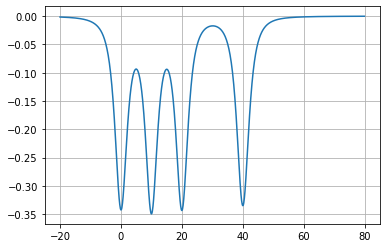

In [31]:
"""
Plot the power
"""

st_tock = 1000
zacetek = -20.0
konec =  80
step = (konec-zacetek)/st_tock
point = []
data = []

for i in range(0,st_tock):
    point.append(zacetek+i*step);
    data.append(f(zacetek+i*step));
plt.figure()
plt.plot(point,data);
plt.grid()
plt.show()

### Naloga 2:

Preskusi iskanje optimalne vrednosti (x) z vsemi metodami. Preveri, ali je metoda našla pravilni rezultat (maksimum moči): 
* Preveri vse metode (pravilnost rezultata) pri začetnem približku 15
* Preveri delovanje pri začetnem približku 18, ter še kakšni svoji vrednosti. Kako so metode (pravilnost rezultata) odvisne od začetnega približka?

> We can now use the presented methods to find the minimum :

In [39]:
# starting point x
start = 15      
# starting interval (Brent method)
zac_int = (5,12)
 
#Conjugate gradient descent
print ('Conjugate gradient descent')
print (optimize.fmin_cg(f,start, disp=True)) #samo zacetna točka
#print( optimize.fmin_cg(f,start,gtol=1e-10)) #povečana natančnost
#print( optimize.fmin_cg(f,start,gtol=1e-5,epsilon=1e-10)) #spremenjen korak in natančnost


# Simplex method
#print ('Simplex')
#print (optimize.fmin(f,start)) #simplex
#print (optimize.fmin(f,start,xtol=1e-10)) #povečana natančnost

# Newton cg
#print ('Newton')
#print (optimize.fmin_ncg(f,start,f_p))    #newton
#print (optimize.fmin_ncg(f,start,f_p,avextol=1e-10)) #povečana natančnost
#print (optimize.fmin_ncg(f,v,f_p,avextol=1e-10,epsilon=1e-2)) #povečana natančnost, povečan korak

# Bisekcija
#print ('Brent')
#print (optimize.brent(f,brack=zac_int))


Conjugate gradient descent
Optimization terminated successfully.
         Current function value: -0.349479
         Iterations: 1
         Function evaluations: 39
         Gradient evaluations: 13
[10.00029446]


### (Bonus) Naloga 3

Spremeni problem tako, da spreminjaš oddajno moč in razmik med oddajniki. Ponovi testiranje z različnimi metodami, in podaj svoje zaključke glede parametrov in pravilnosti rezultatov (začetna točka). 

> Adjust the previous problem by changing the transmitted power (amp parameter) of each transmitter, and optionally changing their  positions. Perform optimization with all methods, trying different parameters and starting points, and write down your conclusions  regarding the reliability and accuracy of different methods. 


## Optimizacija v dveh dimenzijah / Two dimensional problems

Metode delujejo tudi v več dimenzijah, vendar moramo podati funkcijo parcialnih odvodov. Primer Rosenbrockove funkcije.

> All of the presented methods also work in multiple dimensions. Unfortunatelly they also require some additional computation since the gradient function now becomes composed of partial gradients. We will demonstrate this on the Rosenbock function which is given as:  

$0.5(1-x)^2+(y-x^2)^2$

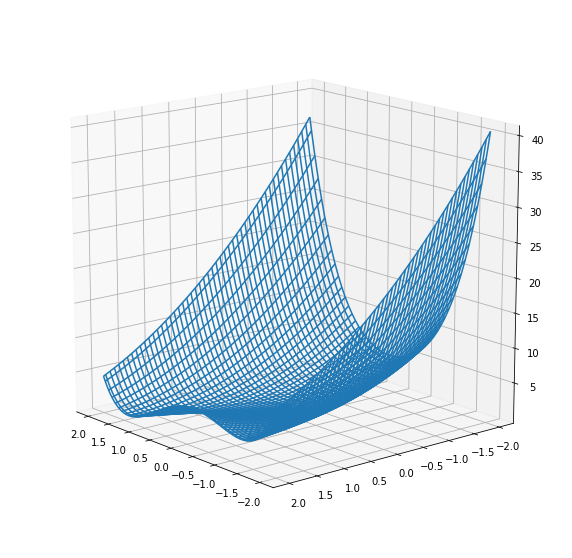

In [45]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np


def f(x): #Rosenbrock
    return .5* (1-x[0])**2+ (x[1] - x[0]**2)**2
    
def f_p(x):  #Rosenbrock partial gradients (d/dx, d/dy)
    return np.array((-2*.5*(1-x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

# 2D visualisation
N = 100
min = -2
max =  2
tocke = np.linspace(min,max,N).tolist();

axis1 = []
axis2 = []
data = []
tmp1 = []
tmp2 = []
tmp3 = []
for i in range(0,N):
    for j in range(0,N):
        tmp1.append(tocke[i]);
        tmp2.append(tocke[j]);
        tmp3.append(f([tocke[i],tocke[j]]));
    axis1.append(tmp1)
    axis2.append(tmp2)
    data.append(tmp3)
    tmp1 = []
    tmp2 = []
    tmp3 = []

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_wireframe(axis1, axis2, np.asarray(data), rstride=2, cstride=2)
ax.view_init(15, 140)
plt.show()

We can again use the previously presented methods to find the solution (1,1).

In [47]:
# Starting estimate (x,y)
start_int = [10,-5]
print (optimize.fmin_cg(f,start_int))
# simplex
#print (optimize.fmin(f,start_int))
# newton
#print (optimize.fmin_ncg(f,start_int,f_p))
# ALTERNATIVE VERSION OF CALLING AN OPTIMIZATION METHOD, dodatne metode

#print( optimize.minimize(f, start_int, method="Powell"))
#print( optimize.minimize(f, start_int, method="CG"))



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 162
         Gradient evaluations: 40
[1.00001693 1.00003739]


In [48]:
# Here, we get optimization result (point), and calculate absolute error 
result1 = optimize.fmin_cg(f,  start_int,  gtol=1e-7)
print(result1)

# Izracun velikosti napake



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 186
         Gradient evaluations: 46
[0.99999966 0.99999927]


### Naloga 3

Izberi svoj začetni interval (približek) in izvedi iskanje minimuma s petimi zgornjimi optimizacijskimi metodami. Rezultate podaj v tabeli (kot v nalogi 1), izračunaj napako rezultata. 
Komentiraj in primerjaj delovanje metod (število iteracij, pravilnost rezultata, natančnost). 


### (Bonus) Naloga 4

Najdi optimum naslednje funkcije, ter komentiraj reyultate.

> Find the minimum of the function given below and experiment using different starting values and iteration numbers in order to find the solution:

$2*x^2+ 2*y^2+2*x*y - 6*x$

> The report should include plot of the function, table of the results (with tested parameters) for each method, and 
conclusions.   